# Exploratory Data Analysis of Google Play Store Apps Dataset

## Dataset Explanation

### Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

### Content
Each app (row) has values for catergory, rating, size, and more.

### Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

### Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

[*You can access the data set by clicking here*](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

### About the Attributes

*App*  
Application name  
*Category*  
Category the app belongs to  
*Rating*  
Overall user rating of the app (as when scraped)    
*Reviews*   
Number of user reviews for the app (as when scraped)  
*Size*  
Size of the app (as when scraped)  
*Installs*  
Number of user downloads/installs for the app (as when scraped)  
*Type*  
Paid or Free  
*Price*  
Price of the app (as when scraped)  
*Content Rating*  
Age group the app is targeted at - Children / Mature 21+ / Adult  
*Genres*  
An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to  
*Last Updated*  
Date when the app was last updated on Play Store (as when scraped)  
*Current Ver*  
Current version of the app available on Play Store (as when scraped)  
*Android Ver*  
Min required Android version (as when scraped)  

## Purpose of Analaysis  
The purpose of analysis is to answer the following questions:  
* : What are the top ten apps by rating and download count?
* : What are top 5 categories by rating?
* : What are top 5 apps by price?
* : Which Category apps have highest number of paid apps?
* : Compare the apps by downloads specifically built for different ages people.
* : Which szie apps are more downloaded?
* : Which genre apps have recieved highest reviews count?
* : Are paid apps really worthy to download?
* : Which android version is mostly compatible for apps?
* : Which age group apps are mostly downloaded?

*This dataset needs to be cleaned and analyzed properly so that above questions can be answered*

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [2]:
file_path = "googleplaystore.csv"

In [3]:
data = pd.read_csv(file_path)

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Exploring the dataset

#### Dealing with missing values

In [5]:
# total missing values in each column
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Dealing with Type apps

In [6]:
replacement_for_Type = data['Type'].mode()
print(replacement_for_Type)

0    Free
Name: Type, dtype: object


In [7]:
data['Type'].replace('0' , "Free", inplace = True)

In [8]:
data['Type'].replace(np.nan , "Free", inplace = True)

In [9]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

Dealing with missing values of Content Rating

In [10]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [11]:
value = data['Content Rating'].mode()
print(value)

0    Everyone
Name: Content Rating, dtype: object


In [12]:
data['Content Rating'].replace(np.nan , value[0] , inplace = True)

In [13]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Dealing with missing values of Current Ver

As per questions, we do not need this column for our analysis, so we can ignore this

Dealing with missing values of Android Ver

In [14]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [15]:
value = data['Android Ver'].mode()
print(value)

0    4.1 and up
Name: Android Ver, dtype: object


In [16]:
data['Android Ver'].replace(np.nan , value[0] , inplace = True)

In [17]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Dealing with missing values of rating column

In [18]:
mean = data['Rating'].mean()
mean = format(mean, '.2f')
print(mean)

4.19


In [19]:
data['Rating'].replace(np.NaN , mean , inplace = True)

In [20]:
data['Rating'].isnull().sum()

0

##### Checking the datatypes

In [21]:
data.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

*Ideal Data Types for each column*  
App : object  
Category : object  
Rating : float64  
Reviews : Integer64  
Size : object(Can work as per Requirement)  
Installs : Integer64  
Type : Object  
Price : float64  
Content Rating : Object  
Genres : Object  
Last Updated : Object  
Current Ver : Object  
Android Ver : Object  

Changing the data type of reviews column

In [22]:
data['Reviews'].dtype

dtype('O')

In [23]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [24]:
for index, entry in data['Reviews'].iteritems():
    if "M" in entry:
        data['Reviews'][index] = '3000000'

In [25]:
for index, entry in data['Reviews'].iteritems():
    if "M" in entry:
        print(entry)

In [26]:
# Now changing the data type of complete column
data['Reviews'] = data['Reviews'].astype(int)

Now checking the data type of all columns

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Rating          10841 non-null  object
 3   Reviews         10841 non-null  int32 
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10841 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10841 non-null  object
 9   Genres          10841 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10841 non-null  object
dtypes: int32(1), object(12)
memory usage: 1.0+ MB


*Changing data type of Rating column to Float*

In [28]:
data['Rating'] = data['Rating'].astype(float)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


*Changing the data type of installs column to Integer after removing '+' sign*

In [30]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [31]:
#As there is a plus sign, so we will remove it first
character_to_delete = '+'
data['Installs'] = data['Installs'].str.replace(character_to_delete, '')

2024-03-05 20:08:37,176 [15744] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\AppData\Local\Temp\ipykernel_15744\3403488246.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace(character_to_delete, '')



In [32]:
data['Installs'].head()

0        10,000
1       500,000
2     5,000,000
3    50,000,000
4       100,000
Name: Installs, dtype: object

In [33]:
# We also have to remove coma from the rows
character_to_delete = ','
data['Installs'] = data['Installs'].str.replace(character_to_delete, '')


In [34]:
data[data['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,Free,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


As it can be seen that above row contain ambiguous data, so we will delete the row

In [35]:
data = data.drop(data[data['Installs'] == 'Free'].index)

In [36]:
data[data['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Hence it is deleted  
Now, we will change the data type of the column

In [37]:
data['Installs'] = data['Installs'].astype(int)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), int32(2), object(10)
memory usage: 1.1+ MB


Now we have to change the data type of this column but first we will check how data is stored in this column and if any non numeric value is also there

In [39]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [40]:
# Deleting '$' sign
character_to_delete = '$'
data['Price'] = data['Price'].str.replace(character_to_delete, '')

2024-03-05 20:08:40,215 [15744] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\AppData\Local\Temp\ipykernel_15744\3665411058.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace(character_to_delete, '')



In [41]:
data['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [42]:
#Now changing the data type
data['Price'] = data['Price'].astype(float)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.1+ MB


### Now we will do some feature engineering by deleting some columns that are not needed to answer the questions


*As Last Update and Current Ver columns are not required for analysis, we will delete them from the dataframe*

In [44]:
data.drop('Last Updated', axis = 1, inplace = True)

In [45]:
data.drop('Current Ver', axis = 1, inplace = True)

In [46]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up


### Deleting duplicated rows

In [47]:
data.drop_duplicates(keep='first', inplace=True)

In [48]:
data.shape

(10355, 11)

###  Some quick insihts from data

In [79]:
data.shape

(10355, 11)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10355 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10355 non-null  object 
 1   Category        10355 non-null  object 
 2   Rating          10355 non-null  float64
 3   Reviews         10355 non-null  int32  
 4   Size            10355 non-null  object 
 5   Installs        10355 non-null  int32  
 6   Type            10355 non-null  object 
 7   Price           10355 non-null  float64
 8   Content Rating  10355 non-null  object 
 9   Genres          10355 non-null  object 
 10  Android Ver     10355 non-null  object 
dtypes: float64(2), int32(2), object(7)
memory usage: 889.9+ KB


In [81]:
data.describe(include=['object'])

,App,Category,Size,Type,Content Rating,Genres,Android Ver
count,10355,10355,10355,10355,10355,10355,10355
unique,9659,33,461,2,6,119,33
top,ROBLOX,FAMILY,Varies with device,Free,Everyone,Tools,4.1 and up
freq,9,1943,1526,9590,8380,841,2381


In [82]:
data.describe()

,Rating,Reviews,Installs,Price
count,10355.000000,1.035500e+04,1.035500e+04,10355.000000
mean,4.188184,4.059634e+05,1.415856e+07,1.031000
std,0.484066,2.697035e+06,8.024728e+07,16.280191
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000
50%,4.200000,1.677000e+03,1.000000e+05,0.000000
75%,4.500000,4.636100e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Answering all the questions

## 1 - What are the top ten apps by rating and download count?

In [62]:
## By rating
top_10 = data[['App' , 'Rating']].sort_values(by = 'Rating', ascending = False).head(10)
top_10

,App,Rating
2533,Zen Leaf,5.0
6726,COMSATS BOOK STORE FOR BS(CS),5.0
9247,EC SPORTS,5.0
9246,Victoria EC,5.0
9245,EC Calgary,5.0
6604,BP Log lite,5.0
6605,MI-BP,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
9899,EU Exit poll,5.0


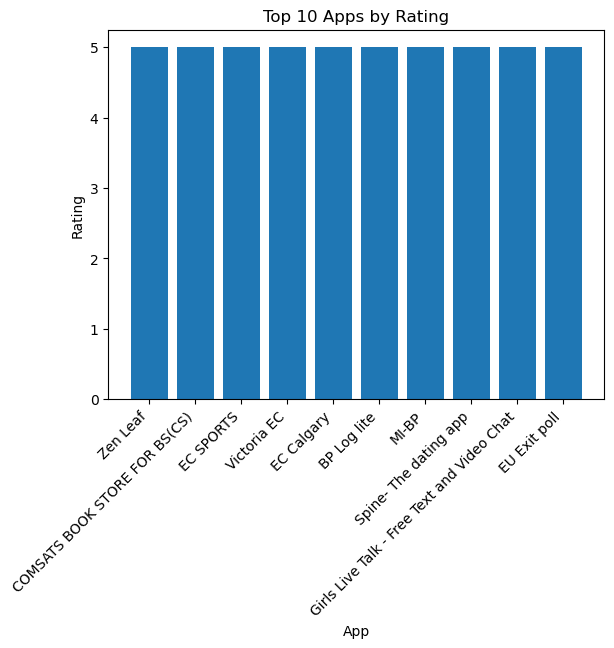

In [64]:
plt.bar(top_10['App'] , top_10['Rating'])
plt.xlabel('App')
plt.ylabel('Rating')
plt.title("Top 10 Apps by Rating")
plt.xticks(rotation=45, ha='right')

plt.show()

In [77]:
#By Installs
top_10 = data[['App' , 'Installs']].sort_values(by = 'Installs', ascending = False).head(14)
top_10.drop_duplicates(keep='first', inplace=True)
top_10

,App,Installs
2544,Facebook,1000000000
3996,Google Chrome: Fast & Secure,1000000000
336,WhatsApp Messenger,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
2853,Google Photos,1000000000
152,Google Play Books,1000000000
3234,Google,1000000000
1750,Subway Surfers,1000000000
3117,Maps - Navigate & Explore,1000000000
3928,YouTube,1000000000


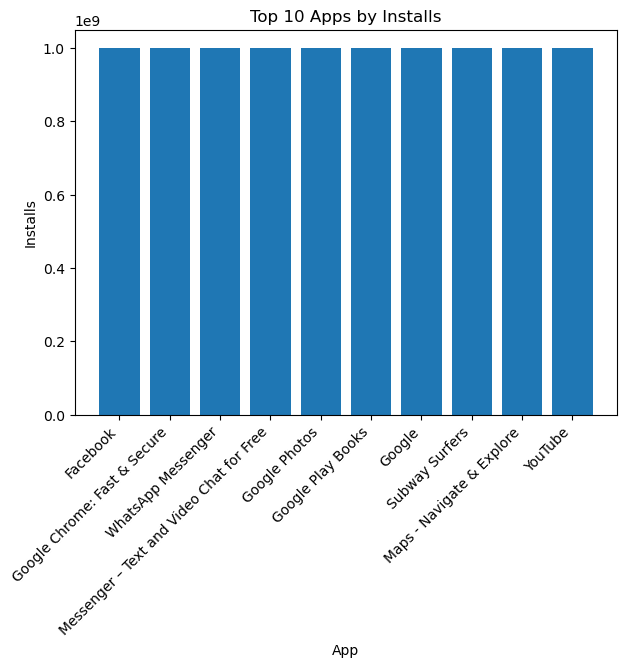

In [80]:
plt.figure(figsize = (7,5))
plt.bar(top_10['App'] , top_10['Installs'])
plt.xlabel('App')
plt.ylabel('Installs')
plt.title("Top 10 Apps by Installs")
plt.xticks(rotation=45, ha='right')

plt.show()

## 2- What are the top 5 Categories by Rating

In [106]:
top_10 = data.groupby('Category')['Rating'].mean().nlargest(10)
top_10 = pd.DataFrame(top_10)

top_10

,Rating
Category,
EDUCATION,4.374538
EVENTS,4.362656
ART_AND_DESIGN,4.350308
BOOKS_AND_REFERENCE,4.311174
PERSONALIZATION,4.304948
PARENTING,4.281667
GAME,4.277458
BEAUTY,4.260189
HEALTH_AND_FITNESS,4.251176


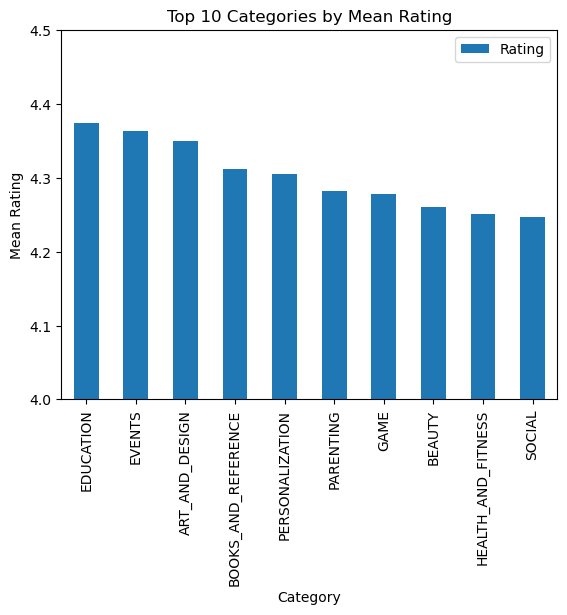

In [111]:
ax = top_10.plot(kind='bar', xlabel='Category', ylabel='Mean Rating', title='Top 10 Categories by Mean Rating')

# Set the y-axis limits
ax.set_ylim(4, 4.5)
# Show the plot
plt.show()

## 3- Top 10 Apps by Prices


In [134]:
top_10 = data[['App' , 'Price']].sort_values(by = 'Price', ascending = False).head(10)
top_10

,App,Price
4362,💎 I'm rich,399.99
5373,I AM RICH PRO PLUS,399.99
4197,most expensive app (H),399.99
9917,Eu Sou Rico,394.99
5357,I am extremely Rich,379.99
9719,EP Cook Book,200.00
6692,cronometra-br,154.99
6624,BP Fitness Lead Scanner,109.99
9730,Lean EQ,89.99
2253,Vargo Anesthesia Mega App,79.99


2024-03-05 22:41:57,875 [15744] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



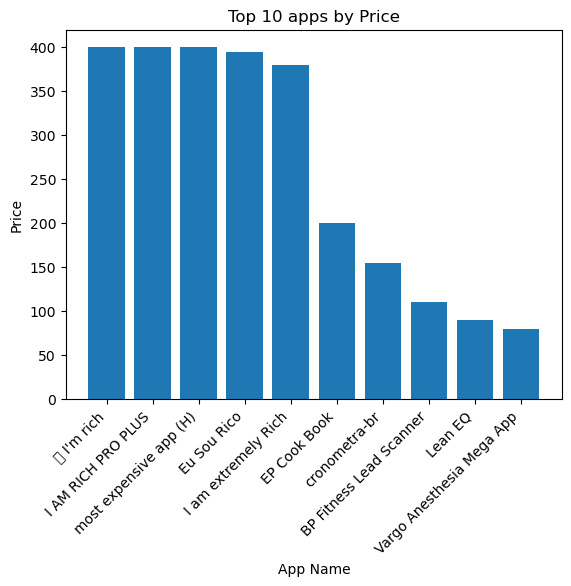

In [135]:
plt.bar(top_10['App'] , top_10['Price'])
plt.title('Top 10 apps by Price')
plt.xlabel('App Name')
plt.ylabel('Price')
plt.xticks(rotation = 45, ha = 'right')
# Show the plot
plt.show()

## 4- Which Category apps has highest number of paid apps?

In [143]:
paid_apps = data[data['Type'] == 'Paid']
top_app = paid_apps['Category'].value_counts().head(1)
top_app = pd.DataFrame(top_app)
top_app

,Category
FAMILY,184


Hence Family Category apps have higher number of paid apps


## 5- Compare the apps by downloads specifically built for different ages people.

As there is a huge difference between in numbers of apps or different ages in the dataset, so we will just find the mean of each category to find the average installs for each age group app

In [147]:
by_age = data.groupby('Content Rating')['Installs'].mean()
by_age = pd.DataFrame(by_age)
by_age

,Installs
Content Rating,
Adults only 18+,6.666667e+05
Everyone,1.197674e+07
Everyone 10+,2.968507e+07
Mature 17+,9.598874e+06
Teen,2.700286e+07
Unrated,2.525000e+04


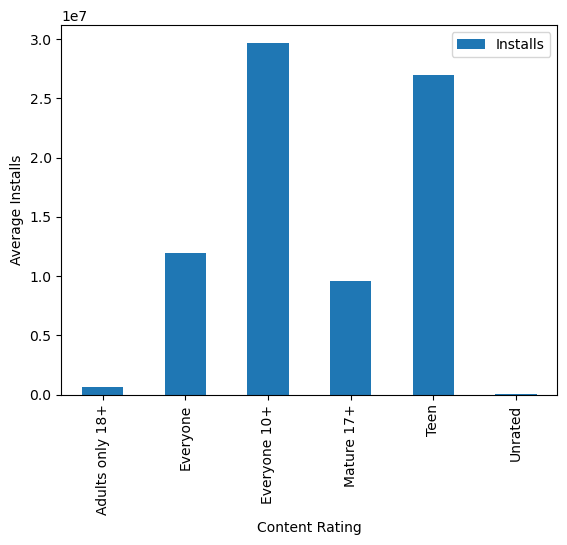

In [151]:
ax = by_age.plot(kind = 'bar', xlabel = 'Content Rating', ylabel = 'Average Installs')
plt.show()

Hence, Everyoe 10+ category has highest installs

## 6- Which szie apps are more downloaded

In [160]:
by_size = data.groupby('Size')['Installs'].sum()
by_size = pd.DataFrame(by_size)
by_size = by_size.sort_values('Installs', ascending = False)
by_size.head(5)

,Installs
Size,
Varies with device,8.854259e+10
76M,5.189110e+09
13M,3.621252e+09
74M,2.827111e+09
24M,2.659222e+09


Hence, apps with size that varies with each device are mostly downloaded by people

## 7- Which genre apps have recieved highest reviews count?

In [176]:
by_genre = data.groupby('Genres')['Reviews'].mean()
by_genre = pd.DataFrame(by_genre)
by_genre = by_genre.sort_values('Reviews', ascending = False)
by_genre.head()

,Reviews
Genres,
Adventure;Action & Adventure,3.087739e+06
Strategy,2.649896e+06
Casual,1.922619e+06
Social,1.905632e+06
Casual;Action & Adventure,1.797712e+06


Hence "Adventure;Action & Adventure" Genre Apps have recieved highest number of reviews

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Adventure;Action & Adventure'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Strategy'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Casual'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Social'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'Casual;Action & Adventure'),
  Text(4.5, 0, '')])

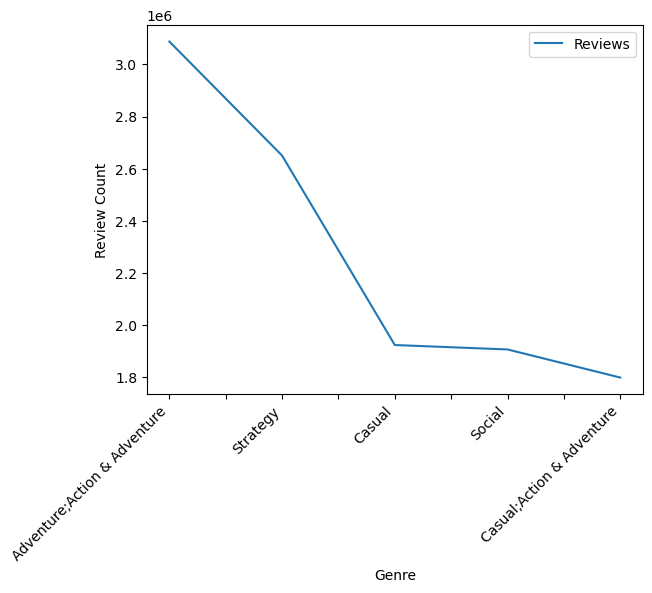

In [177]:
by_genre.head().plot(kind = 'line', xlabel = 'Genre', ylabel = 'Review Count')
plt.xticks(rotation = 45, ha = 'right')

## 8- Are paid apps really worthy to download

Showing the average, minimum and maximum values of rating of Paid apps


In [202]:
paid_apps = data[['Type','Rating']]
paid_apps = paid_apps[paid_apps['Type'] == 'Paid']
paid_apps.sort_values('Rating', ascending  = False)

,Type,Rating
4452,Paid,5.0
4988,Paid,5.0
7100,Paid,5.0
9039,Paid,5.0
7204,Paid,5.0
...,...,...
7658,Paid,2.0
4161,Paid,1.8
6948,Paid,1.7
5978,Paid,1.0


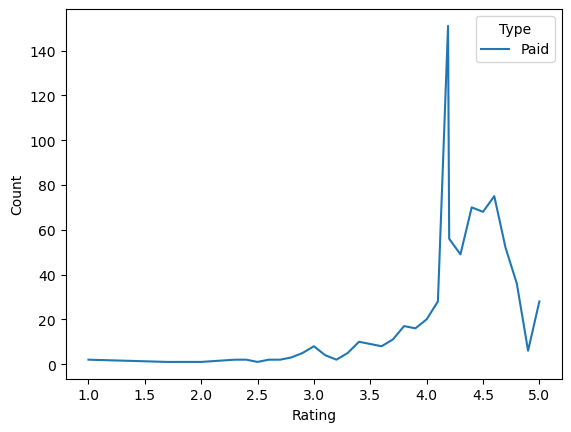

In [203]:
grouped_data = paid_apps.groupby('Rating')['Type'].value_counts().reset_index(name='Count')
sns.lineplot(data=grouped_data, x='Rating', y='Count', hue='Type')
plt.show()

It can be seen that the paid apps have mostly rating of greater than 4


## 9- Which android version is mostly compatible for apps?

In [212]:
And = data[['Android Ver']].groupby('Android Ver').value_counts().sort_values(ascending = False)
And = pd.DataFrame(And)

In [214]:
And.head()

,0
Android Ver,
4.1 and up,2378
4.0.3 and up,1447
4.0 and up,1336
Varies with device,1221
4.4 and up,891


<AxesSubplot:xlabel='Android Ver'>

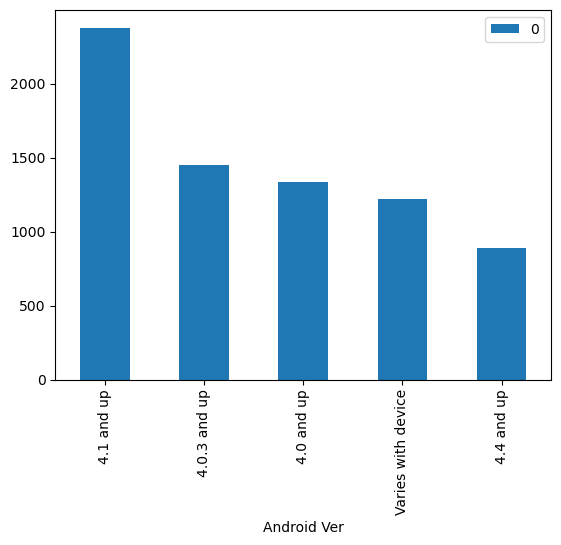

In [215]:
And.head().plot(kind = 'bar')

Hence It can be seen that ANdroid Version 4.1 and up is mostly compatible for most kind of apps

## 10- Which age group apps are mostly downloaded?

In [217]:
Age_trend = data[['Content Rating','Installs']].groupby('Content Rating').mean()

In [222]:
Age_trend = Age_trend.sort_values(by = 'Installs', ascending = False)
Age_trend

,Installs
Content Rating,
Everyone 10+,2.968507e+07
Teen,2.700286e+07
Everyone,1.197674e+07
Mature 17+,9.598874e+06
Adults only 18+,6.666667e+05
Unrated,2.525000e+04


<AxesSubplot:xlabel='Content Rating'>

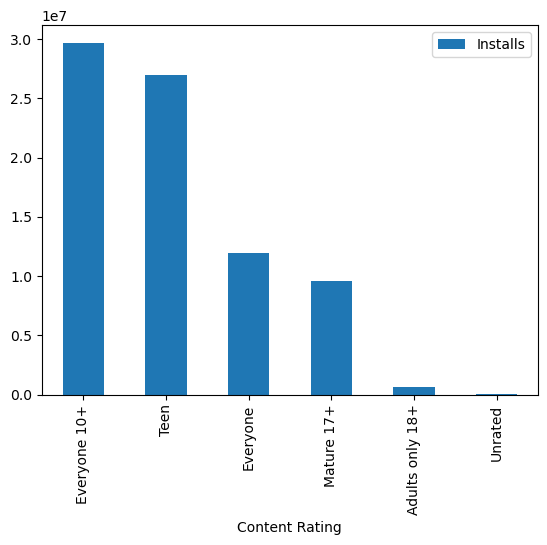

In [223]:
Age_trend.plot(kind = 'bar')

Hence it can be seen that the apps that are made for 10+ years audience are mostly downloaded

# Conclusion

All of these insights can help an Android Developer that is looking to launch his own app. He can now decide that what kind of app he should develop to gain audience. Whether it should be paid or not. If he wants to upload a paid app, then he should also look after its quality as most of the paid apps have rating of more than 4.0.  
He can also now decide that whehter he should build an app for 10+ aged people of for teens. He can also choose the genre based on the statistics.  
In short, it is basically for those people who wants to build an app to upload but they don't know what kind of app he should build.